In [ ]:
##################################################################---Feature Engineering---#################################################################
#
#                                                                          WordCloud 
#                                                     Suppression des colonnes inutiles dans le suite du projet                                                                                   
#                                                             Création de nouvelles caractéristiques
#                                               Analyse de correlation des variables explicatives et de la variable cible 
#                                                                            

############################################################################################################################################################

################################################## - RECUPERATION de la derniere base sauvegardée csv - ##################################


import pandas as pd

#df = pd.read_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\train_projet_truspilot2_etape2.csv", sep=',')

df = pd.read_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\df_projet_truspilot2_etape2.csv", sep=',')
pd.set_option('display.max_colwidth', None)  # Permet d'afficher la colonne entière

# Renommage des colonnes
df.rename(columns={'Note client': 'Note_client'}, inplace=True)
df.rename(columns={"Nombre d'avis du client": 'Nombre_avis_client'}, inplace=True)
df.rename(columns={'Titre commentaire': 'Titre_commentaire'}, inplace=True)
df.rename(columns={'Date de publication': 'Date_de _publication'}, inplace=True)
print(len(df))
display(df.head(5))
pd.set_option('display.max_colwidth', None) 


################################################ - IMPORTATION des bibliotheques - ##################################################


import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
#Téléchargement des ressources NLTK si nécessaire

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import PunktSentenceTokenizer #decoupage en phrase

from nltk.tokenize import word_tokenize #decoupage en mot
from nltk.corpus import stopwords #filtrage stop words
from nltk.tokenize.regexp import RegexpTokenizer #pour détacher "laissez-vous"
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer  ###CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer ## score TF-IDF 
from nltk.stem.snowball import FrenchStemmer #Normalisation lexicale-La racinisation
from nltk.stem import WordNetLemmatizer # lemmatisation
from wordcloud import WordCloud #nuage de mot

import statsmodels.api
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize



{'acheté': 256, 'premi': 14334, 'configurztion': 3937, 'chez': 3064, 'materiel': 11451, 'conseils': 4118, 'époque': 21026, 'permis': 13696, 'garder': 8584, 'configuration': 3932, 'jusqu': 10461, 'maintenant': 11186, 'aujourd': 1609, 'suite': 18667, 'arret': 1284, 'prochain': 14516, 'support': 18733, 'windows': 20692, 'window': 20691, 'appel': 1070, 'technique': 19124, 'réponses': 17317, 'rapides': 15538, 'claires': 3229, 'durant': 5771, 'années': 941, 'réguli': 17240, 'rement': 16235, 'sans': 17531, 'faille': 7773, 'partais': 13364, 'recherche': 15772, 'premier': 14335, 'ecran': 6549, 'gamer': 8550, 'sachant': 17458, 'tellement': 19164, 'commencer': 3548, 'trouvé': 19796, 'site': 18034, 'plein': 13973, 'utiles': 20031, 'prendre': 14352, 'décision': 5933, 'proposant': 14736, 'prix': 14462, 'attractifs': 1562, 'lors': 11025, 'prochaine': 14517, 'commande': 3465, 'matériel': 11494, 'commencerai': 3549, 'récemment': 17095, 'probl': 14493, 'carte': 2744, 'graphique': 8778, 'remplacée': 1628

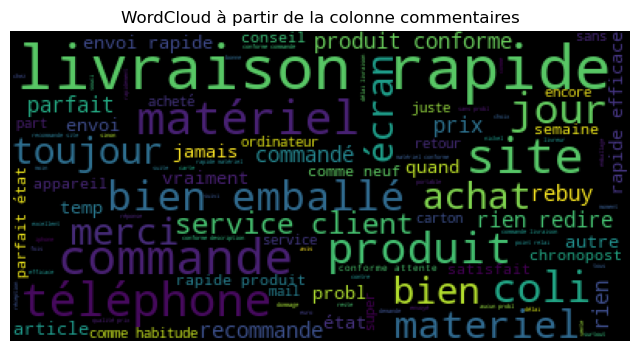

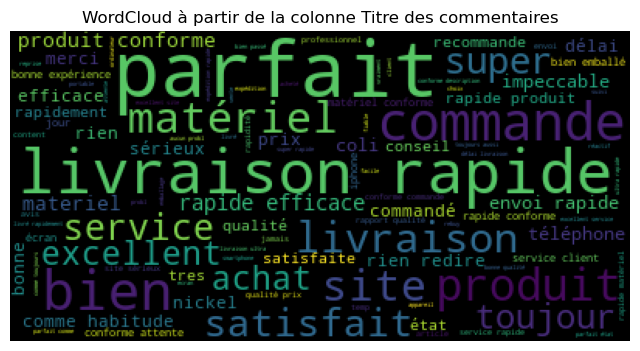

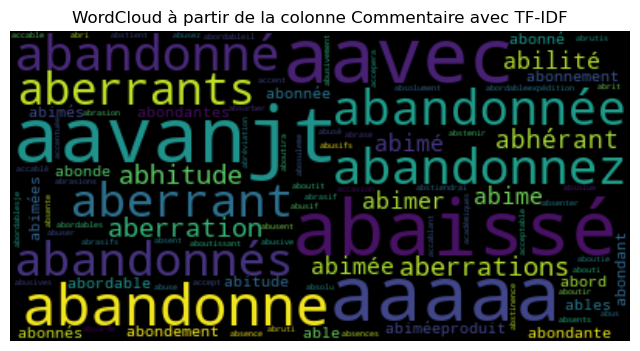

In [ ]:


######################################################################################################################################################################
#                                                                  WordCloud -Nuage de mots
#                                             Traitement du contenu des commentaires et des titres des commentaires
#                                                                     
#########################################################################################################################################################################

####################################### - Preparation des colonnes Commentaire et titre de commentaires - ###############


# Remplace les valeurs manquantes de la colonne Commentaire par le contenu de la colonne titre
df['Commentaire'] = df['Commentaire'].fillna(df['Titre_commentaire'])

# 1-Mettre en minuscules
df["Commentaire"] = df["Commentaire"].str.lower()
df["Titre_commentaire"] = df["Titre_commentaire"].str.lower()

# 2 Supprime les chiffres
df["Commentaire"] = df["Commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))
df["Titre_commentaire"] = df["Titre_commentaire"].apply(lambda x: re.sub(r'[0-9]', ' ', x))

# Application de la tokenisation - découpage d'un paragraphe en phrase
tokenizer = PunktSentenceTokenizer()
df['phrases'] = df['Commentaire'].apply(lambda x: tokenizer.tokenize(x))

# Application de la tokenization - découpage en mots avec word_tokenize
df['mots'] = df['Commentaire'].apply(lambda x: word_tokenize(x, language='french'))
df['mots_titre'] = df['Titre_commentaire'].apply(lambda x: word_tokenize(x, language='french'))

# Filtrage Stop Words
stop_words = set(stopwords.words('french'))
stop_words.update([",", ".", "cela", "fait", "dire", "bonjour", "faire", "avoir", "peut", "donc", "mais","avec","avant","alors","tout","bref","plus","cette"])

def stop_words_filtering(mots): 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

# Applique la fonction de la colonne 'mots' (issue de commentaire)
mots_filtres = stop_words_filtering(df['mots'].sum())
mots_filtres_titre = stop_words_filtering(df['mots_titre'].sum())

# Conserve les mots avec plus de 4 caractères
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")
tokens = tokenizer.tokenize(' '.join(mots_filtres))  
tokens_titre = tokenizer.tokenize(' '.join(mots_filtres_titre)) 

# Lemmatisation
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatisation(mots):
    sortie = []
    for mot in mots:
        lemme_verbe = wordnet_lemmatizer.lemmatize(mot, pos='v')
        lemme_nom = wordnet_lemmatizer.lemmatize(mot, pos='n')
        
        if lemme_verbe not in sortie:
            sortie.append(lemme_verbe)
        if lemme_nom not in sortie:
            sortie.append(lemme_nom)
    return sortie

tokenslemma = lemmatisation(tokens)
tokenslemma_titre = lemmatisation(tokens_titre)

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
vectorized_tfidf = vectorizer_tfidf.fit_transform([' '.join(tokenslemma)])
tokenized_tfidf = vectorizer_tfidf.vocabulary_

print(tokenized_tfidf)

############################################### - NUAGE DE MOTS - ###########################################################################

# ---- Nuage de mots des commentaire----

#Transforme en liste
var=' '.join(tokens)
wc=WordCloud(background_color="black",max_words=100,stopwords=stop_words,max_font_size=50, random_state=42)

# Visualisation du nuage de mots
plt.figure(figsize= (8,6)) 
wc.generate(var)          # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.axis('off')
plt.title("WordCloud à partir de la colonne commentaires" )
plt.show()

# ---- Nuage de mots de titre commentaire ----

#Transforme en liste
var=' '.join(tokens_titre)
wc=WordCloud(background_color="black",max_words=100,stopwords=stop_words,max_font_size=50, random_state=42)

# Visualisation du nuage de mots
plt.figure(figsize= (8,6)) 
wc.generate(var)          # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.axis('off')
plt.title("WordCloud à partir de la colonne Titre des commentaires" )
plt.show()

# Création d'un nuage de mots___sans Algorithme Bag of Words________

# Générer le nuage de mots à partir des mots et de leurs fréquences
# Création d'un nuage de mots à partir de TF-IDF
word_freq = {word: count for word, count in zip(vectorizer_tfidf.get_feature_names_out(), vectorized_tfidf.toarray().sum(axis=0))}
wc.generate_from_frequencies(word_freq)

# Afficher le nuage de mots
plt.figure(figsize=(8, 6))  # Initialisation d'une figure
plt.imshow(wc, interpolation='bilinear')  # Affichage
plt.axis('off')  # Pas d'axes
plt.title("WordCloud à partir de la colonne Commentaire avec TF-IDF" )
plt.show()  


# Fonction pour lemmatiser les mots d'un commentaire et titre commentaire  en une colonne du df
def lemmatize_commentaire(commentaire):
    mots = word_tokenize(commentaire, language='french')
    mots_filtres = stop_words_filtering(mots)
    tokens = tokenizer.tokenize(' '.join(mots_filtres))  
    return lemmatisation(tokens)

# Applique la fonction à la colonne 'Commentaire' pour creer une nouvelle colonne 'Lemmes_commentaire'
df['Lemmes'] = df['Commentaire'].apply(lemmatize_commentaire)

# Applique la fonction à la colonne 'titre Commentaire' pour creer d'une nouvelle colonne 'Lemmes_titre_commentaire'
df['Lemmes_titre_commentaire'] = df['Titre_commentaire'].apply(lemmatize_commentaire)

______TC class_nps et la note du client_____________
 


Note_client,1,2,3,4,5,Total
class_note,,,,,,
insatisfait,2434,753,0,0,0,3187
passif,0,0,1302,0,0,1302
satisfait,0,0,0,4427,24647,29074
Total,2434,753,1302,4427,24647,33563


Note_client,1,2,3,4,5
class_note,,,,,
insatisfait,0.763728,0.236272,0.000000,0.000000,0.000000
passif,0.000000,0.000000,1.000000,0.000000,0.000000
satisfait,0.000000,0.000000,0.000000,0.152267,0.847733
Total,0.072520,0.022435,0.038793,0.131901,0.734350


Note_client,1,2,3,4,5,Total
class_note,,,,,,
insatisfait,1.0,1.0,0.0,0.0,0.0,0.094956
passif,0.0,0.0,1.0,0.0,0.0,0.038793
satisfait,0.0,0.0,0.0,1.0,1.0,0.866252


count    33563.000000
mean         3.166344
std          4.000113
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        123.000000
Name: Nombre_avis_client, dtype: float64

______TC class_nbavis et la note du client_____________
 


Note_client,1,2,3,4,5,Total
class_nbavis,,,,,,
1,1181,395,633,1941,9597,13747
2-3,732,223,367,1438,8277,11037
4-123,521,135,302,1048,6773,8779
Total,2434,753,1302,4427,24647,33563


Note_client,1,2,3,4,5
class_nbavis,,,,,
1,0.085910,0.028734,0.046046,0.141194,0.698116
2-3,0.066322,0.020205,0.033252,0.130289,0.749932
4-123,0.059346,0.015378,0.034400,0.119376,0.771500
Total,0.072520,0.022435,0.038793,0.131901,0.734350


Note_client,1,2,3,4,5,Total
class_nbavis,,,,,,
1,0.485210,0.524568,0.486175,0.438446,0.389378,0.409588
2-3,0.300740,0.296149,0.281874,0.324825,0.335822,0.328844
4-123,0.214051,0.179283,0.231951,0.236729,0.274800,0.261568


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33563 entries, 0 to 33562
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Nombre total avis         33563 non-null  int64   
 1   Date_de _publication      33563 non-null  object  
 2   Nombre_avis_client        33563 non-null  int64   
 3   Note_client               33563 non-null  int64   
 4   Titre_commentaire         33563 non-null  object  
 5   Commentaire               33563 non-null  object  
 6   phrases                   33563 non-null  object  
 7   mots                      33563 non-null  object  
 8   mots_titre                33563 non-null  object  
 9   Lemmes                    33563 non-null  object  
 10  Lemmes_titre_commentaire  33563 non-null  object  
 11  class_note                33563 non-null  category
 12  class_nbavis              33563 non-null  category
dtypes: category(2), int64(3), object(8)
memory usa

count     33563
unique        3
top           1
freq      13747
Name: class_nbavis, dtype: object

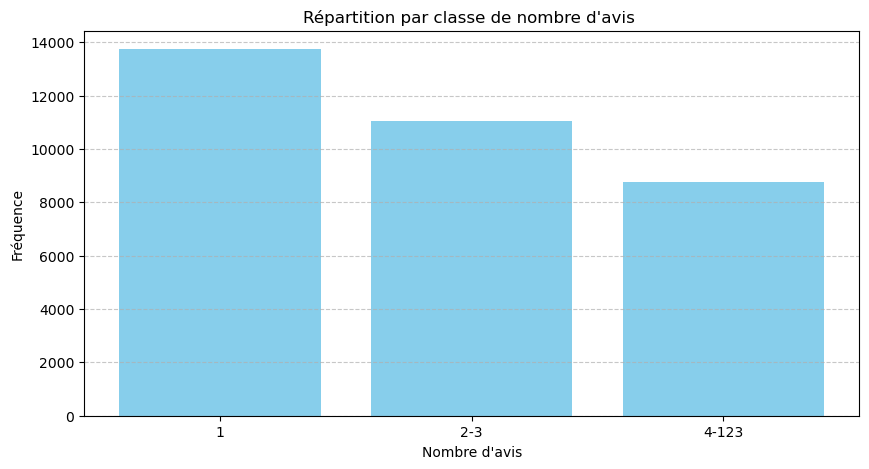

_______________________Graph ___Répartition des notes clients par nombre d'avis___________________________________


C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:94: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby(['class_nbavis', 'Note_client']).size().unstack(fill_value=0)


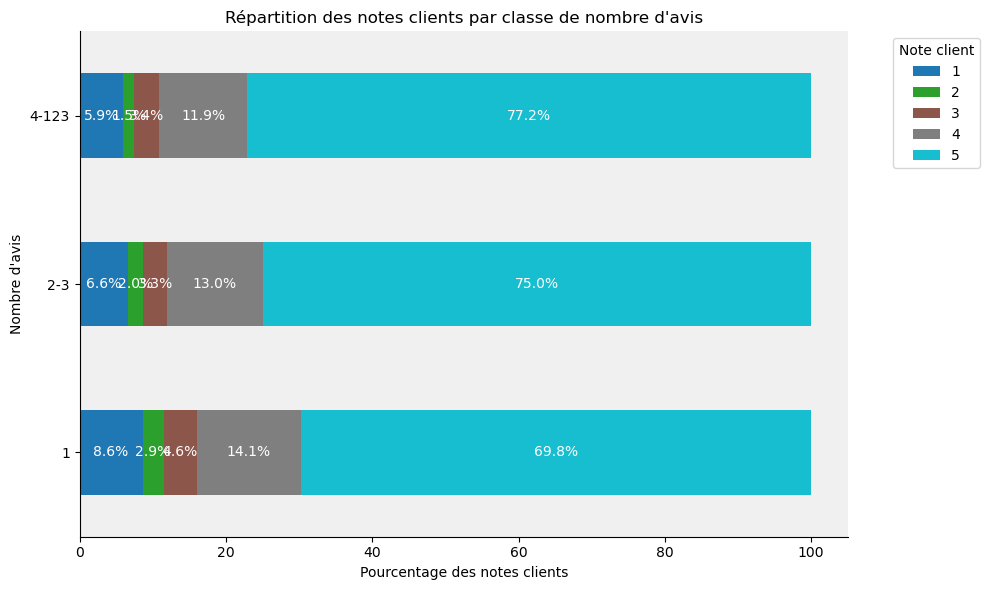

C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = table['PR(>F)'][0]  # p-value de la première ligne
C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:143: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  statistique = table['F'][0]    # statistique F de la première ligne


,df,sum_sq,mean_sq,F,PR(>F)
Note_client,1.0,591.342203,591.342203,36.99644,1.196222e-09
Residual,33561.0,536430.959856,15.983760,NaN,NaN


 
Test ANOVA
 
H0 : Il n'y a pas d'effet significatif de la variable nombre d'avis sur la note
H1 : Il y a un effet significatif de la variable nombre d'avis sur la note 
 
La statistique du test est :  36.9964397291121 
La p-valeur du test est :  1.1962219964671044e-09 

Conclusion: le nombre d'avis a un effet significatif sur la note du client
____________________________________________________________________________________________________________________
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33563 entries, 0 to 33562
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Nombre total avis         33563 non-null  int64   
 1   Date_de _publication      33563 non-null  object  
 2   Nombre_avis_client        33563 non-null  int64   
 3   Note_client               33563 non-null  int64   
 4   Titre_commentaire         33563 non-null  object  
 5   Commentaire               3

count    33563.000000
mean         1.864613
std          1.659043
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         36.000000
Name: nbre_phrases, dtype: float64

______________________Stat sur la variable nombre de mots____________________________________________________________________________


count    33563.000000
mean        30.741233
std         45.109463
min          0.000000
25%          9.000000
50%         17.000000
75%         35.000000
max        979.000000
Name: nbre_mots, dtype: float64

Nombre de mots au total : 1031768
Nombre de mots distincts : 21276
 


C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:239: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = table['PR(>F)'][0]  # p-value de la première ligne
C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:240: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  statistique = table['F'][0]    # statistique F de la première ligne


,df,sum_sq,mean_sq,F,PR(>F)
Note_client,1.0,1.398630e+07,1.398630e+07,8643.222454,0.0
Residual,33561.0,5.430779e+07,1.618182e+03,NaN,NaN


 
Test ANOVA
 
H0 : Il n'y a pas d'effet significatif de la variable nombre de mot sur la note
H1 : Il y a un effet significatif de la variable nombre de mot sur la note 
 
La statistique du test est :  8643.222454133756 
La p-valeur du test est :  0.0 

Conclusion: le nombre de mot dans le commentaire a un effet significatif sur la note du client
____________________________________________________________________________________________________________________
 
 
_____________________TC longueur du commentaire et la note du client________________________________________________


Note_client,1,2,3,4,5,Total
class_longueur_mot,,,,,,
Très court,135,36,76,950,8041,9238
Court,179,63,128,823,6910,8103
moyen,379,169,340,1207,5897,7992
long,1741,485,758,1447,3798,8229
Total,2434,753,1302,4427,24646,33562


Note_client,1,2,3,4,5
class_longueur_mot,,,,,
Très court,0.014614,0.003897,0.008227,0.102836,0.870426
Court,0.022091,0.007775,0.015797,0.101567,0.852771
moyen,0.047422,0.021146,0.042543,0.151026,0.737863
long,0.211569,0.058938,0.092113,0.175842,0.461538
Total,0.072522,0.022436,0.038794,0.131905,0.734342


Note_client,1,2,3,4,5,Total
class_longueur_mot,,,,,,
Très court,0.055464,0.047809,0.058372,0.214592,0.326260,0.275252
Court,0.073541,0.083665,0.098310,0.185905,0.280370,0.241434
moyen,0.155711,0.224436,0.261137,0.272645,0.239268,0.238126
long,0.715283,0.644090,0.582181,0.326858,0.154102,0.245188


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33563 entries, 0 to 33562
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Nombre total avis         33563 non-null  int64   
 1   Date_de _publication      33563 non-null  object  
 2   Nombre_avis_client        33563 non-null  int64   
 3   Note_client               33563 non-null  int64   
 4   Titre_commentaire         33563 non-null  object  
 5   Commentaire               33563 non-null  object  
 6   phrases                   33563 non-null  object  
 7   mots                      33563 non-null  object  
 8   mots_titre                33563 non-null  object  
 9   Lemmes                    33563 non-null  object  
 10  Lemmes_titre_commentaire  33563 non-null  object  
 11  class_note                33563 non-null  category
 12  class_nbavis              33563 non-null  category
 13  nbre_mots                 33563 non-null  int6

count          33562
unique             4
top       Très court
freq            9238
Name: class_longueur_mot, dtype: object

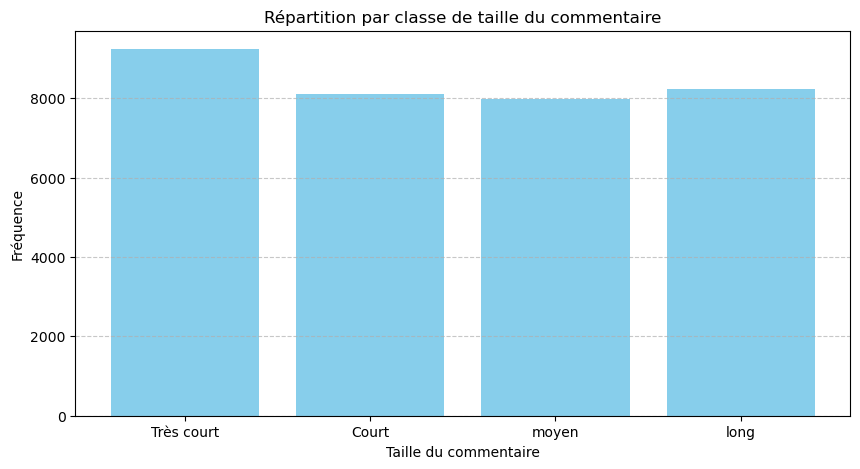

_______________________Graph ___Répartition des notes clients par la taille du commentaire___________________________________


C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:309: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby(['class_longueur_mot', 'Note_client']).size().unstack(fill_value=0)


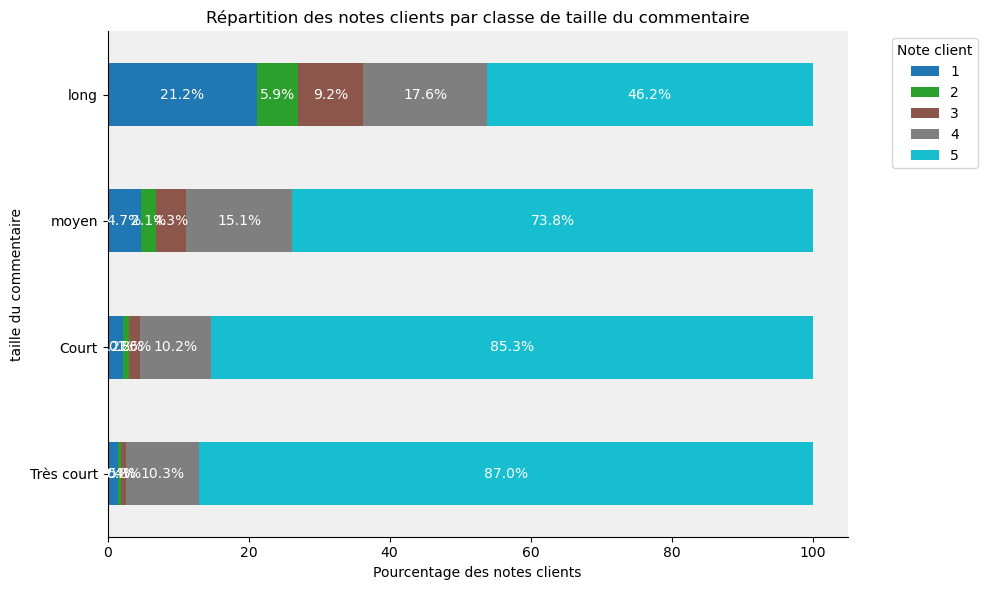

___________________Réalisation du test du khi2 d'indépendance sur les variables longueur du commentaire et la note du client___________



Chi2ContingencyResult(statistic=6102.015751597177, pvalue=0.0, dof=20, expected_freq=array([[  669.96281509,   207.26458495,   358.37780824,  1218.53959836,
         6783.85519337,  9238.        ],
       [  587.64978249,   181.79962458,   314.34676122,  1068.82727489,
         5950.37655682,  8103.        ],
       [  579.59978547,   179.30921876,   310.0406412 ,  1054.18580538,
         5868.86454919,  7992.        ],
       [  596.78761695,   184.62657172,   319.23478935,  1085.44732138,
         6042.90370061,  8229.        ],
       [ 2434.        ,   753.        ,  1302.        ,  4427.        ,
        24646.        , 33562.        ]]))

Test du khi2 d'indépendance
 
𝐻0 : La note du client est indépendante de la classe longueur du commentaire
𝐻1 : La note du client n'est pas indépendante de la classe longueur du commentaire
 
La statistique du test est :  6102.015751597177 
La p-valeur du test est :  0.0 

Nous rejetons l'hypothèse nulle H0.
La note du client dépend de la classe longueur du commentaire.
____________________________________________________________________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33563 entries, 0 to 33562
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Nombre total avis         33563 non-null  int64   
 1   Date_de _publication      33563 non-null  object  
 2   Nombre_avis_client        33563 non-null  int64   
 3   Note_client               33563 non-null  int64   
 4   Titre_commentaire         33563 non-null  object  
 5   Com

count    33563.000000
mean         0.376873
std          1.362076
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         74.000000
Name: pt_exclam2, dtype: float64

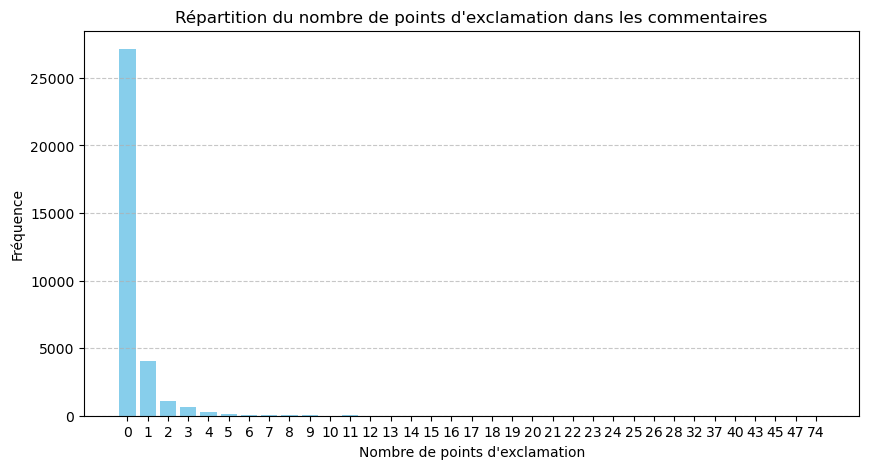

 
Test ANOVA
 
H0 : Il n'y a pas d'effet significatif de la variable nombre de point d'exclamation sur la note
H1 : Il y a un effet significatif de la variable nombre de point d'exclamation sur la note 
 
La statistique du test est :  1490.870265224722 
La p-valeur du test est :  3.72017e-319 

Conclusion: le nombre de point d'exclamation dans le commentaire a un effet significatif sur la note du client
____________________________________________________________________________________________________________________
 
______________________Stat sur la variable nombre de !_____________________________________________________________


C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:439: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = table['PR(>F)'][0]  # p-value de la première ligne
C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:440: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  statistique = table['F'][0]    # statistique F de la première ligne


count    33563.000000
mean         0.376873
std          1.362076
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         74.000000
Name: pt_exclam2, dtype: float64

______TC class_pt_exclam et la note du client_____________
 


Note_client,1,2,3,4,5,Total
class_pt_exclam,,,,,,
E0,1510,575,1107,3885,20051,27128
E1,284,83,116,371,3208,4062
E2,154,31,35,85,771,1076
E3,149,25,23,54,382,633
E4,334,39,21,32,235,661
Total,2431,753,1302,4427,24647,33560


Note_client,1,2,3,4,5
class_pt_exclam,,,,,
E0,0.055662,0.021196,0.040807,0.143210,0.739126
E1,0.069916,0.020433,0.028557,0.091334,0.789759
E2,0.143123,0.028810,0.032528,0.078996,0.716543
E3,0.235387,0.039494,0.036335,0.085308,0.603476
E4,0.505295,0.059002,0.031770,0.048411,0.355522
Total,0.072437,0.022437,0.038796,0.131913,0.734416


Note_client,1,2,3,4,5,Total
class_pt_exclam,,,,,,
E0,0.621144,0.763612,0.850230,0.877569,0.813527,0.808343
E1,0.116824,0.110226,0.089094,0.083804,0.130158,0.121037
E2,0.063348,0.041169,0.026882,0.019200,0.031282,0.032062
E3,0.061292,0.033201,0.017665,0.012198,0.015499,0.018862
E4,0.137392,0.051793,0.016129,0.007228,0.009535,0.019696


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33563 entries, 0 to 33562
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Nombre total avis         33563 non-null  int64   
 1   Date_de _publication      33563 non-null  object  
 2   Nombre_avis_client        33563 non-null  int64   
 3   Note_client               33563 non-null  int64   
 4   Titre_commentaire         33563 non-null  object  
 5   Commentaire               33563 non-null  object  
 6   phrases                   33563 non-null  object  
 7   mots                      33563 non-null  object  
 8   mots_titre                33563 non-null  object  
 9   Lemmes                    33563 non-null  object  
 10  Lemmes_titre_commentaire  33563 non-null  object  
 11  class_note                33563 non-null  category
 12  class_nbavis              33563 non-null  category
 13  nbre_mots                 33563 non-null  int6

count     33560
unique        5
top          E0
freq      27128
Name: class_pt_exclam, dtype: object

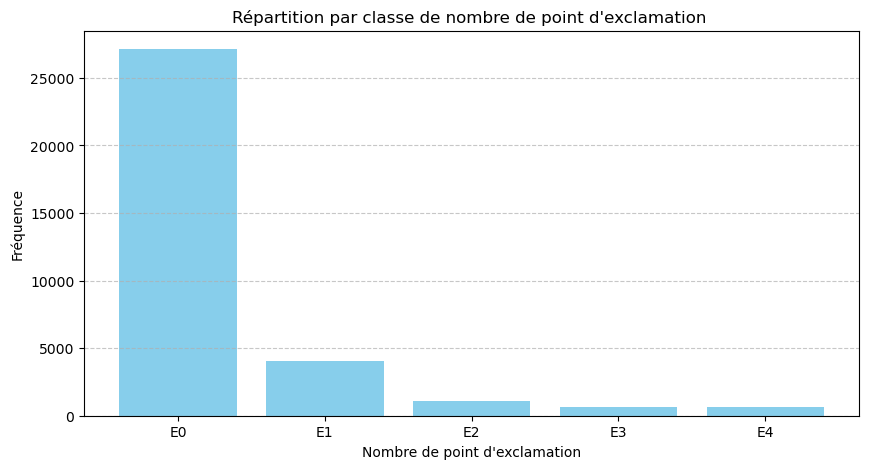

_______________________Graph ___Répartition des notes clients par la taille du commentaire___________________________________


C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:512: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby(['class_pt_exclam', 'Note_client']).size().unstack(fill_value=0)


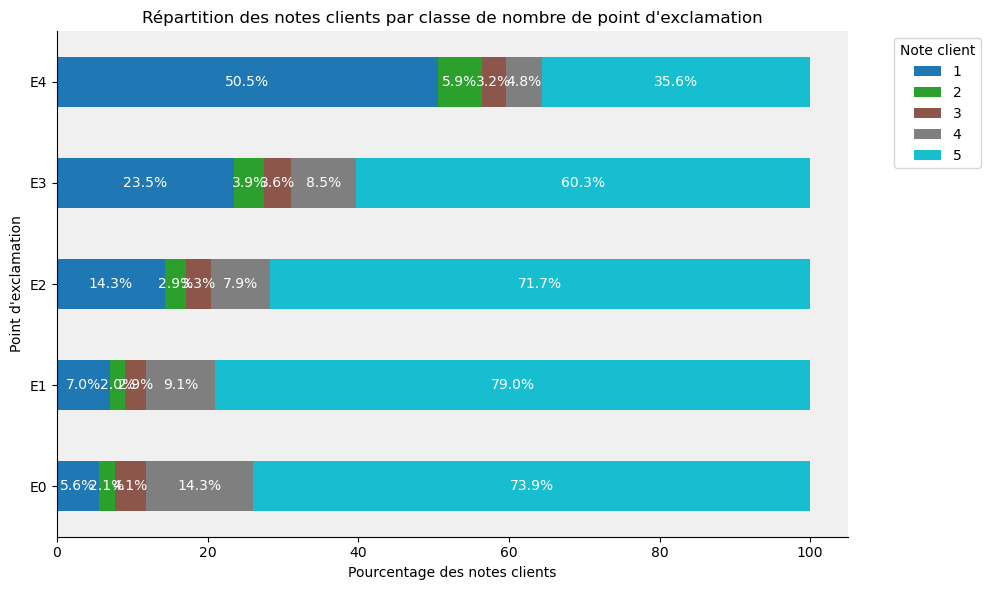

____________________Réalisation du test du khi2 d'indépendance sur les variables nombre de ! et la note du client___________



Chi2ContingencyResult(statistic=2842.2368910604937, pvalue=0.0, dof=175, expected_freq=array([[1.96733164e+03, 6.08628073e+02, 1.05236886e+03, 3.57821577e+03,
        1.99214557e+04, 2.71280000e+04],
       [2.94577600e+02, 9.11326759e+01, 1.57576021e+02, 5.35782677e+02,
        2.98293103e+03, 4.06200000e+03],
       [7.80318803e+01, 2.41405119e+01, 4.17409648e+01, 1.41925692e+02,
        7.90160951e+02, 1.07600000e+03],
       [4.59053720e+01, 1.42016208e+01, 2.45557906e+01, 8.34934601e+01,
        4.64843757e+02, 6.33000000e+02],
       [1.87827667e+01, 5.81077377e+00, 1.00473140e+01, 3.41624110e+01,
        1.90196734e+02, 2.59000000e+02],
       [8.62991985e+00, 2.66981497e+00, 4.61633346e+00, 1.56962429e+01,
        8.73876888e+01, 1.19000000e+02],
       [6.23674880e+00, 1.92944612e+00, 3.33617376e+00, 1.13435033e+01,
        6.31541281e+01, 8.60000000e+01],
       [4.06113875e+00, 1.25638352e+00, 2.17239222e+00, 7.38646724e+00,
        4.11236183e+01, 5.60000000e+01],
       [2

Test du khi2 d'indépendance
 
𝐻0 : La note du client est indépendante de la classe nombre de point d'exclamation
𝐻1 : La note du client  n'est pas indépendante de la classe nombre de points d'exclamation
 
La statistique du test est :  2842.2368910604937 
La p-valeur du test est :  0.0 

Nous rejetons l'hypothèse nulle H0.
La note du client dépend de la classe nombre de points d'exclamation.
____________________________________________________________________________________________________________________



,Nombre total avis,Date_de _publication,Nombre_avis_client,Note_client,Titre_commentaire,Commentaire,phrases,mots,mots_titre,Lemmes,...,nbre_phrases,class_longueur_mot,class_pt_exclam,Type,Nombre d'Émoticônes Total,Type Emo,Nombre_Émoticônes_Positives,Nombre_Émoticônes_Négatives,Émoticônes Positives,Émoticônes Négatives
10538,29387,2021-06-30,4,5,parfait 👍,parfait 👍excellente qualité.,[parfait 👍excellente qualité.],"['parfait', '👍excellente', 'qualité', '.']","[parfait, 👍]","[parfait, excellente, qualité]",...,1,Très court,E0,Positif,1,Positif,1,0,[👍],[]


valeur type: Type
Neutre     33115
Positif      393
Négatif       55
Name: count, dtype: int64


C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:668: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


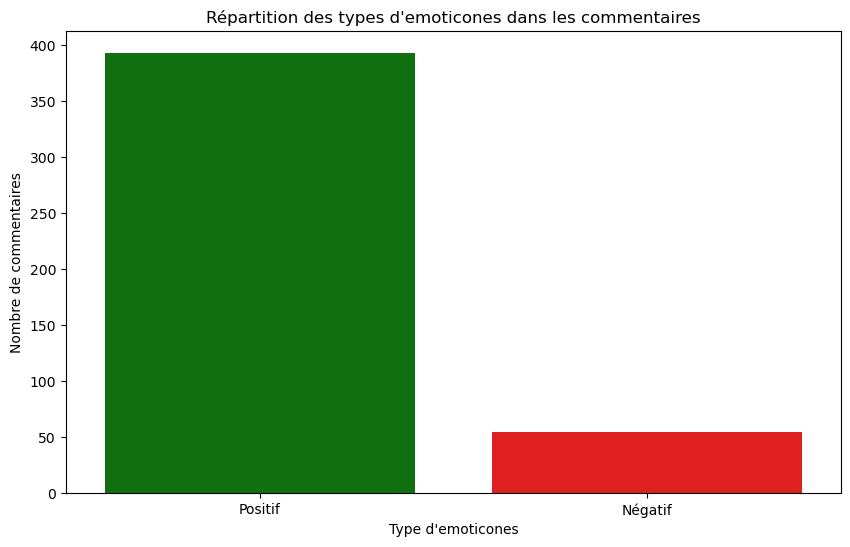

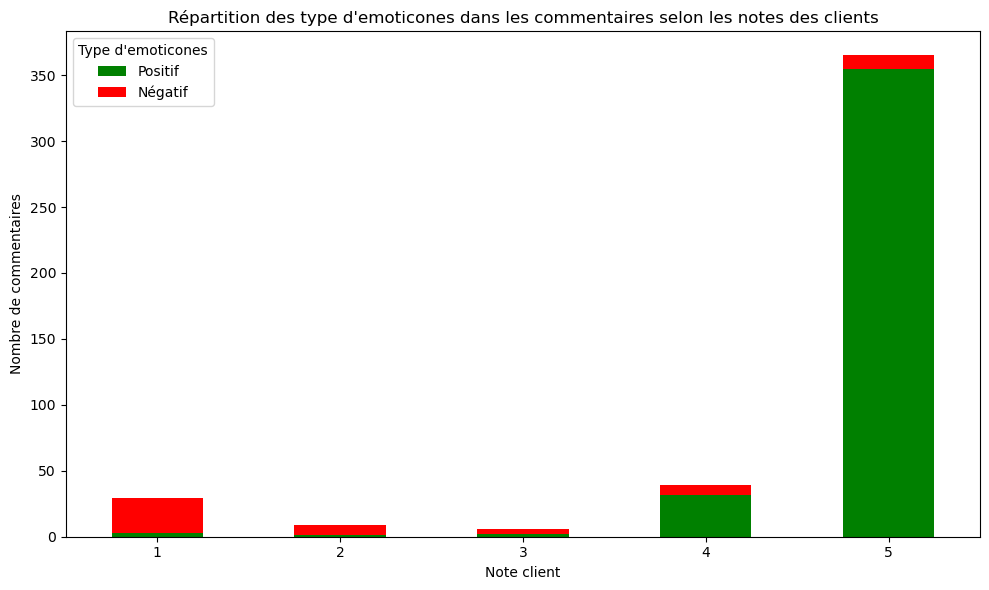

,Nombre total avis,Date_de _publication,Nombre_avis_client,Note_client,Titre_commentaire,Commentaire,phrases,mots,mots_titre,Lemmes,...,Type,Nombre d'Émoticônes Total,Type Emo,Nombre_Émoticônes_Positives,Nombre_Émoticônes_Négatives,Émoticônes Positives,Émoticônes Négatives,sentiment,polarité,class_sentiment
0,29384,2024-12-11,6,5,très bon support technique,"bonjour, j'ai acheté ma première configurztion en chez materiel.net et les conseils de l'époque m'ont permis de garder cette configuration jusqu'à maintenant ( ans).aujourd'hui suite à l'arret prochain du support windows j'ai fait appel au support technique. les réponses étaient rapides et claires.durant ces années j'ai régulièrement fait appel à leur support sans faille.mon prochain pc sera un materiel.net.","[bonjour, j'ai acheté ma première configurztion en chez materiel.net et les conseils de l'époque m'ont permis de garder cette configuration jusqu'à maintenant ( ans).aujourd'hui suite à l'arret prochain du support windows j'ai fait appel au support technique., les réponses étaient rapides et claires.durant ces années j'ai régulièrement fait appel à leur support sans faille.mon prochain pc sera un materiel.net.]","['bonjour', ',', ""j'ai"", 'acheté', 'ma', 'première', 'configurztion', 'en', 'chez', 'materiel.net', 'et', 'les', 'conseils', 'de', ""l'époque"", ""m'ont"", 'permis', 'de', 'garder', 'cette', 'configuration', 'jusqu', ""'"", 'à', 'maintenant', '(', 'ans', ')', "".aujourd'hui"", 'suite', 'à', ""l'arret"", 'prochain', 'du', 'support', 'windows', ""j'ai"", 'fait', 'appel', 'au', 'support', 'technique', '.', 'les', 'réponses', 'étaient', 'rapides', 'et', 'claires.durant', 'ces', 'années', ""j'ai"", 'régulièrement', 'fait', 'appel', 'à', 'leur', 'support', 'sans', 'faille.mon', 'prochain', 'pc', 'sera', 'un', 'materiel.net', '.']","[très, bon, support, technique]","[acheté, premi, configurztion, chez, materiel, conseils, époque, permis, garder, configuration, jusqu, maintenant, aujourd, suite, arret, prochain, support, windows, window, appel, technique, réponses, rapides, claires, durant, années, réguli, rement, sans, faille]",...,Neutre,0,Neutre,0,0,[],[],0.0,0.176000,Positif
1,29384,2024-12-02,2,5,site clair et infos constructives,"je partais à la recherche de mon premier ecran de pc gamer, ne sachant pas tellement par où commencer. j'ai trouvé sur le site plein de conseils utiles qui m'ont permis de prendre ma décision, tout en proposant des prix attractifs. lors d'une prochaine commande de matériel, je commencerai par ce site !","[je partais à la recherche de mon premier ecran de pc gamer, ne sachant pas tellement par où commencer., j'ai trouvé sur le site plein de conseils utiles qui m'ont permis de prendre ma décision, tout en proposant des prix attractifs., lors d'une prochaine commande de matériel, je commencerai par ce site !]","['je', 'partais', 'à', 'la', 'recherche', 'de', 'mon', 'premier', 'ecran', 'de', 'pc', 'gamer', ',', 'ne', 'sachant', 'pas', 'tellement', 'par', 'où', 'commencer', '.', ""j'ai"", 'trouvé', 'sur', 'le', 'site', 'plein', 'de', 'conseils', 'utiles', 'qui', ""m'ont"", 'permis', 'de', 'prendre', 'ma', 'décision', ',', 'tout', 'en', 'proposant', 'des', 'prix', 'attractifs', '.', 'lors', ""d'une"", 'prochaine', 'commande', 'de', 'matériel', ',', 'je', 'commencerai', 'par', 'ce', 'site', '!']","[site, clair, et, infos, constructives]","[partais, recherche, premier, ecran, gamer, sachant, tellement, commencer, trouvé, site, plein, conseils, utiles, permis, prendre, décision, proposant, prix, attractifs, lors, prochaine, commande, matériel, commencerai]",...,Neutre,0,Neutre,0,0,[],[],0.0,0.197813,Positif


C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:769: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


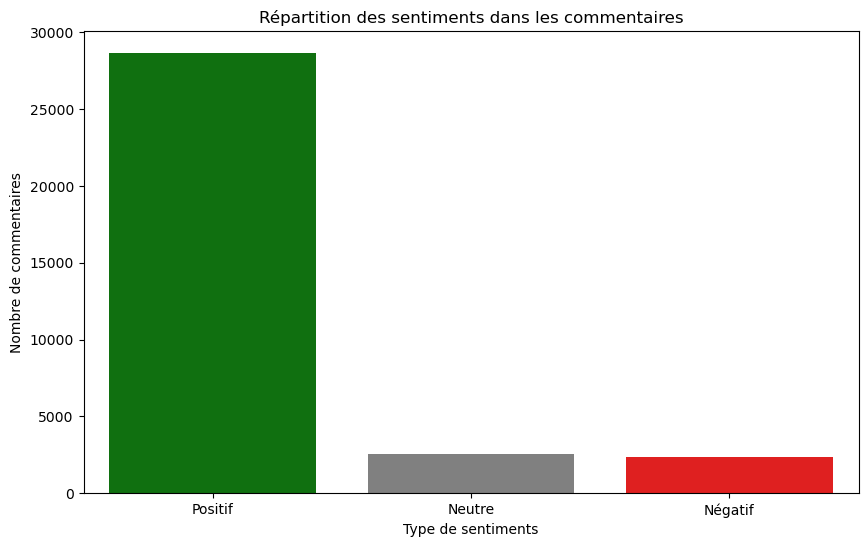

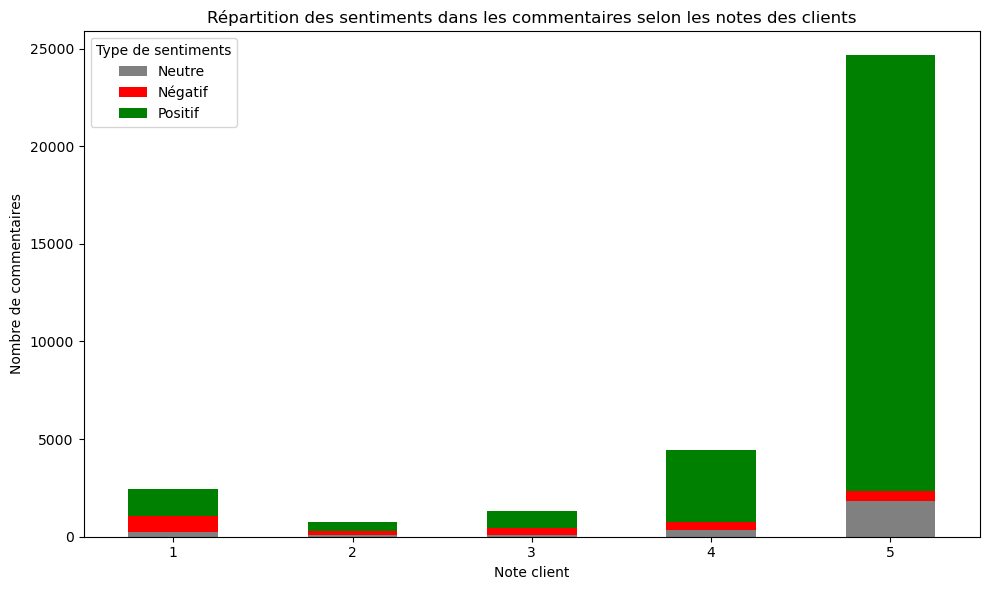

 
Test ANOVA
 
H0 : Il n'y a pas d'effet significatif de la variable score de  polarité sur la note
H1 : Il y a un effet significatif de la variable score de  polarité sur la note 
 
La statistique du test est :  5928.133650735545 
La p-valeur du test est :  0.0 

Conclusion: le score de  polarité  a un effet significatif sur la note du client
____________________________________________________________________________________________________________________
 
____________________Réalisation du test du khi2 d'indépendance sur les variables classe polarité et la note du client___________



C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:811: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = table['PR(>F)'][0]  # p-value de la première ligne
C:\Users\magal\AppData\Local\Temp\ipykernel_3872\776698474.py:812: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  statistique = table['F'][0]    # statistique F de la première ligne


Chi2ContingencyResult(statistic=5400.900788056859, pvalue=0.0, dof=15, expected_freq=array([[  186.44978101,    57.68146471,    99.73607842,   339.11798707,
         1888.01468879,  2571.        ],
       [  170.78538867,    52.835414  ,    91.35685129,   310.62732771,
         1729.39501832,  2355.        ],
       [ 2076.76483032,   642.48312129,  1110.90707029,  3777.25468522,
        21029.59029288, 28637.        ],
       [ 2434.        ,   753.        ,  1302.        ,  4427.        ,
        24647.        , 33563.        ]]))

Test du khi2 d'indépendance
 
𝐻0 : La note du client est indépendante de la classe sentiment
𝐻1 : La note du client  n'est pas indépendante de la classe sentiment
 
La statistique du test est :  5400.900788056859 
La p-valeur du test est :  0.0 

Nous rejetons l'hypothèse nulle H0.
La note du client dépend de la classe sentiment.
____________________________________________________________________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33563 entries, 0 to 33562
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Nombre_avis_client           33563 non-null  int64   
 1   Note_client                  33563 non-null  int64   
 2   Titre_commentaire            33563 non-null  object  
 3   Commentaire                  33563 non-null  object  
 4   mots                         33563 non-null  object  
 5   mots_titre             

,Nombre_avis_client,Note_client,Titre_commentaire,Commentaire,mots,mots_titre,Lemmes,Lemmes_titre_commentaire,class_note,class_nbavis,nbre_mots,nbre_phrases,class_longueur_mot,class_pt_exclam,Nombre_Émoticônes_Positives,Nombre_Émoticônes_Négatives,class_sentiment,emoticones,sentimentfr,Nombre_Émoticônes
0,6,5,très bon support technique,"bonjour, j'ai acheté ma première configurztion en chez materiel.net et les conseils de l'époque m'ont permis de garder cette configuration jusqu'à maintenant ( ans).aujourd'hui suite à l'arret prochain du support windows j'ai fait appel au support technique. les réponses étaient rapides et claires.durant ces années j'ai régulièrement fait appel à leur support sans faille.mon prochain pc sera un materiel.net.","['bonjour', ',', ""j'ai"", 'acheté', 'ma', 'première', 'configurztion', 'en', 'chez', 'materiel.net', 'et', 'les', 'conseils', 'de', ""l'époque"", ""m'ont"", 'permis', 'de', 'garder', 'cette', 'configuration', 'jusqu', ""'"", 'à', 'maintenant', '(', 'ans', ')', "".aujourd'hui"", 'suite', 'à', ""l'arret"", 'prochain', 'du', 'support', 'windows', ""j'ai"", 'fait', 'appel', 'au', 'support', 'technique', '.', 'les', 'réponses', 'étaient', 'rapides', 'et', 'claires.durant', 'ces', 'années', ""j'ai"", 'régulièrement', 'fait', 'appel', 'à', 'leur', 'support', 'sans', 'faille.mon', 'prochain', 'pc', 'sera', 'un', 'materiel.net', '.']","[très, bon, support, technique]","[acheté, premi, configurztion, chez, materiel, conseils, époque, permis, garder, configuration, jusqu, maintenant, aujourd, suite, arret, prochain, support, windows, window, appel, technique, réponses, rapides, claires, durant, années, réguli, rement, sans, faille]","[support, technique]",satisfait,4-123,66,2,long,E0,0,0,Positif,Neutre,0.176000,0
1,2,5,site clair et infos constructives,"je partais à la recherche de mon premier ecran de pc gamer, ne sachant pas tellement par où commencer. j'ai trouvé sur le site plein de conseils utiles qui m'ont permis de prendre ma décision, tout en proposant des prix attractifs. lors d'une prochaine commande de matériel, je commencerai par ce site !","['je', 'partais', 'à', 'la', 'recherche', 'de', 'mon', 'premier', 'ecran', 'de', 'pc', 'gamer', ',', 'ne', 'sachant', 'pas', 'tellement', 'par', 'où', 'commencer', '.', ""j'ai"", 'trouvé', 'sur', 'le', 'site', 'plein', 'de', 'conseils', 'utiles', 'qui', ""m'ont"", 'permis', 'de', 'prendre', 'ma', 'décision', ',', 'tout', 'en', 'proposant', 'des', 'prix', 'attractifs', '.', 'lors', ""d'une"", 'prochaine', 'commande', 'de', 'matériel', ',', 'je', 'commencerai', 'par', 'ce', 'site', '!']","[site, clair, et, infos, constructives]","[partais, recherche, premier, ecran, gamer, sachant, tellement, commencer, trouvé, site, plein, conseils, utiles, permis, prendre, décision, proposant, prix, attractifs, lors, prochaine, commande, matériel, commencerai]","[site, clair, infos, info, constructives]",satisfait,2-3,58,3,long,E1,0,0,Positif,Neutre,0.197813,0


In [3]:

######################################################################################################################################################################
#                                                                   Feature Engineering
#                                                                      
########################################################################################################################################################################


###################################### - SUPPRESSION des colonnes inutiles dans le cadre de ce projet- ##########################################
#################################################################################################################################################


df=df.drop(columns=["Nom entreprise", "Page", "Note globale","Nom du client","Pays"])
#display(df.head(2))


####################################### - CREATION de variables / DATA VIZ / CORRELATION - #########################################################
####################################################################################################################################################


#__________________________________________________________________________________________________________________________________________#
#                                                           Création "CLASSE NOTE" 
#                                                  
#                                     mais reportée pour l'instant et utilsable si modele n'est pas assez performant
#___________________________________________________________________________________________________________________________________________#



# 1-Creation de colonne class_nps : "promoteur" note de 4-5, "passif" note 3 et "détracteur" note 1-2

df['class_note'] = pd.cut(x = df['Note_client'], bins = [1,2,3,5], labels = ['insatisfait', 'passif', 'satisfait'], include_lowest = True)

# val=df['class_nps'].value_counts()

print("______TC class_nps et la note du client_____________")
print(" ")
tab11 = pd.crosstab(df['class_note'], df['Note_client'], margins=True, margins_name='Total')
display(tab11)

tab12=pd.crosstab(df['class_note'],df['Note_client'],normalize=0,margins=True, margins_name='Total')
display(tab12)
print(" ")
tab13=pd.crosstab(df['class_note'],df['Note_client'],normalize=1,margins=True, margins_name='Total')
display(tab13)


#______________________________________________________________________________________________________________________________________________________________________________#
#                                                       
#                                                          Création "NOMBRE_AVIS_CLIENT"
#______________________________________________________________________________________________________________________________________________________________________________#


# 1-Création 

display(df['Nombre_avis_client'].describe())


df['class_nbavis'] = pd.cut(x = df['Nombre_avis_client'], bins = [-1,1,3,123], labels = ['1', '2-3', '4-123'], include_lowest = True)
# val=df['class_nbavis'].value_counts()

# 2-Exploration et DATAVIZ

print("______TC class_nbavis et la note du client_____________")
print(" ")
tab=pd.crosstab(df['class_nbavis'], df['Note_client'],margins=True, margins_name='Total')
display(tab)
print(" ")
tab21=pd.crosstab(df['class_nbavis'],df['Note_client'],normalize=0,margins=True, margins_name='Total')
display(tab21)
print(" ")
tab22=pd.crosstab(df['class_nbavis'],df['Note_client'],normalize=1,margins=True, margins_name='Total')
display(tab22)


#Répartition nombre avis
valavis = df['class_nbavis'].value_counts().sort_index()

df.info()
print(" ")
print("______________________Stat sur la classe nombre d avis _______________________________________")
display(df['class_nbavis'].describe())

#  l'histogramme
plt.figure(figsize=(10, 5))
plt.bar(valavis.index.astype(str), valavis.values, color='skyblue')
plt.xlabel("Nombre d'avis")
plt.ylabel('Fréquence')
plt.title("Répartition par classe de nombre d'avis ")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("____________________Graph ___Répartition des notes clients par nombre d'avis___________________")


# Calcule la fréquence des notes par classe nb avis
count_df = df.groupby(['class_nbavis', 'Note_client']).size().unstack(fill_value=0)

# Calcule les pourcentages
percentage_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Création de la figure
plt.figure(figsize=(10, 6))

# Ajout un fond gris clair
plt.gca().set_facecolor('#f0f0f0')

# Création de l'histogramme empilé horizontal
percentage_df.plot(kind='barh', stacked=True, colormap='tab10', ax=plt.gca())

plt.title("Répartition des notes clients par classe de nombre d'avis")
plt.xlabel('Pourcentage des notes clients')
plt.ylabel("Nombre d'avis")
plt.legend(title='Note client', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affiche les pourcentages à côté des barres
for i in range(len(percentage_df)):
    for j in range(len(percentage_df.columns)):
        plt.text(percentage_df.iloc[i, :j+1].sum() - percentage_df.iloc[i, j] / 2,
                 i, f'{percentage_df.iloc[i, j]:.1f}%', ha='center', va='center', color='white')

# Supprime le contour du graphique
sns.despine()

plt.tight_layout()
plt.show()

# 3-Anlayse la corrélation

#____Réalisation du test ANOVA  car le nombre d'avis est considere comme variable continue __________

# H0:Il n'y a pas d'effet significatif de la variable nombre d'avis sur la note 
# H1:Il y a un effet significatif de la variable nombre d'avis sur la note 

result = statsmodels.formula.api.ols('Nombre_avis_client ~ Note_client', data=df).fit()

table=statsmodels.api.stats.anova_lm(result)

p_value = table['PR(>F)'][0]  # p-value de la première ligne
statistique = table['F'][0]    # statistique F de la première ligne

display(table)
print(" ")
print("Test ANOVA")
print(" ")
print("H0 : Il n'y a pas d'effet significatif de la variable nombre d'avis sur la note")
print("H1 : Il y a un effet significatif de la variable nombre d'avis sur la note ")
print(" ")
print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_value, "\n")

if p_value<0.05:
    print("Conclusion: le nombre d'avis a un effet significatif sur la note du client")
else:
    print("Conclusion : la nombre d'avis n'a pas un effet significatif sur la note du client")
    
print("______________________________________________________________________________________________")   
print(" ")


#______________________________________________________________________________________________________________________________________________________________________________#
#                                                
#                                                    Création "NOMBRE DE MOTS" DANS LE COMMENTAIRE
#                                                    Création "NOMBRE DE PHRASES" DANS LE COMMENTAIRE
#______________________________________________________________________________________________________________________________________________________________________________#


# 1-_Appliquer à nouveau la tokenisation _

tokenizer = PunktSentenceTokenizer()

# Applique la tokenisation, en vérifiant que chaque valeur est une chaîne
df['phrases'] = df['Commentaire'].apply(lambda x: tokenizer.tokenize(x) if isinstance(x, str) else [])

# Applique la tokenisation pour découper en mots avec word_tokenize
df['mots'] = df['Commentaire'].apply(lambda x: word_tokenize(x, language='french') if isinstance(x, str) else [])

# 2-_Compter le nombre de phrases et de mots_

df['nbre_mots']=df['mots'].apply(lambda x: len(x))
df['nbre_phrases']=df['phrases'].apply(lambda x: len(x))

df.info()
print(" ")
print("______________________Stat sur la variable nombre de phrases___________________________________________________")
display(df['nbre_phrases'].describe())

print("______________________Stat sur la variable nombre de mots_______________________________________________________")
display(df['nbre_mots'].describe())


# Nombre total de mots
df['mots'].apply(len).sum()
total_mots = df['mots'].apply(len).sum()
print("Nombre de mots au total :", total_mots)

# Nombre de mots distincts apres le traitement de texte num 1
total_mots_distincts = df['Lemmes'].explode().nunique()
print("Nombre de mots distincts :", total_mots_distincts)
print(" ")


# 3-Anlayse la CORRELATION_

#__Réalisation du test ANOVA car le nombre de mot est considere comme variable continue _________

# H0:Il n'y a pas d'effet significatif de la variable nombre nombre de mot sur la note 
# H1:Il y a un effet significatif de la variable nombre de mot sur la note 

result = statsmodels.formula.api.ols('nbre_mots ~ Note_client', data=df).fit()

table=statsmodels.api.stats.anova_lm(result)

p_value = table['PR(>F)'][0]  # p-value de la première ligne
statistique = table['F'][0]    # statistique F de la première ligne

display(table)
print(" ")
print("Test ANOVA")
print(" ")
print("H0 : Il n'y a pas d'effet significatif de la variable nombre de mot sur la note")
print("H1 : Il y a un effet significatif de la variable nombre de mot sur la note ")
print(" ")
print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_value, "\n")

if p_value<0.05:
    print("Conclusion: le nombre de mot dans le commentaire a un effet significatif sur la note du client")
else:
    print("Conclusion : la nombre de mot dans le commentaire un effet significatif sur la note du client")
    
print("___________________________________________________________________________________________________")   
print(" ")

#______________________________________________________________________________________________________________________________________________________________________________#
#                                                
#                                                   CLASSIFICATION "NOMBRE DE MOTS" DANS LE COMMENTAIRE - en "class_longueur_mot"
#                                                  
#______________________________________________________________________________________________________________________________________________________________________________#


# 1-_CREATION -classes__
# # choix de la méthode des quartiles pour tenir compte la distribution réelle des données

df['class_longueur_mot'] = pd.cut(x = df['nbre_mots'], bins = [1,9,17,35,980], labels = ['Très court', 'Court', 'moyen', 'long'], include_lowest = True)


# 2-_EXPLORATION et DATAVIZ_

print(" ")
print("_____________________TC longueur du commentaire et la note du client_____________________________________________")

tabc=pd.crosstab(df['class_longueur_mot'],df['Note_client'],margins=True, margins_name='Total')
display(tabc)
print(" ")
tab32=pd.crosstab(df['class_longueur_mot'],df['Note_client'],normalize=0,margins=True, margins_name='Total')
display(tab32)
print(" ")
tab33=pd.crosstab(df['class_longueur_mot'],df['Note_client'],normalize=1,margins=True, margins_name='Total')
display(tab33)



# Répartition mot
valmot = df['class_longueur_mot'].value_counts().sort_index()

df.info()
print(" ")
print("______________________Stat sur la categorie class_longueur_mot ________________________________________________")
display(df['class_longueur_mot'].describe())

#  l'histogramme
plt.figure(figsize=(10, 5))
plt.bar(valmot.index.astype(str), valmot.values, color='skyblue')
plt.xlabel("Taille du commentaire")
plt.ylabel('Fréquence')
plt.title("Répartition par classe de taille du commentaire")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("_______________________Graph ___Répartition des notes clients par la taille du commentaire_____________________")


# Calcule la fréquence des notes par classe nb avis
count_df = df.groupby(['class_longueur_mot', 'Note_client']).size().unstack(fill_value=0)

# Calcule les pourcentages
percentage_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Création de la figure
plt.figure(figsize=(10, 6))

# Ajout un fond gris clair
plt.gca().set_facecolor('#f0f0f0')

# Création de l'histogramme empilé horizontal
percentage_df.plot(kind='barh', stacked=True, colormap='tab10', ax=plt.gca())

plt.title("Répartition des notes clients par classe de taille du commentaire")
plt.xlabel('Pourcentage des notes clients')
plt.ylabel("taille du commentaire")
plt.legend(title='Note client', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affiche les pourcentages à côté des barres
for i in range(len(percentage_df)):
    for j in range(len(percentage_df.columns)):
        plt.text(percentage_df.iloc[i, :j+1].sum() - percentage_df.iloc[i, j] / 2,
                 i, f'{percentage_df.iloc[i, j]:.1f}%', ha='center', va='center', color='white')

# Supprime le contour du graphique
sns.despine()

plt.tight_layout()
plt.show()


# 3-_Anlayse la CORRELATION_

#___Correlation entre la classe longueur du commentaire et la note client______

print("_____Réalisation du test du khi2 d'indépendance sur les variables longueur du commentaire et la note du client______")
print( "")

#𝐻0 : La note du client est indépendante de la classe longueur du commentaire
#𝐻1 : La note du client n'est pas indépendante de la classe longueur du commentaire

resultats_chi2 = chi2_contingency(tabc)   #argument un tableau de contingence
display(resultats_chi2)
p_value = resultats_chi2[1]
statistique = resultats_chi2[0]
print("Test du khi2 d'indépendance")
print(" ")
print("𝐻0 : La note du client est indépendante de la classe longueur du commentaire")
print("𝐻1 : La note du client n'est pas indépendante de la classe longueur du commentaire")
print(" ")
print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_value, "\n")
alpha=0.05

if p_value < alpha:
    print("Nous rejetons l'hypothèse nulle H0.")
    print("La note du client dépend de la classe longueur du commentaire.")
else:
    print("Nous ne rejetons pas l'hypothèse nulle H0.")
    print("La note du client indépendante de la classe longueur du commentaire.")

# Conclusion :
# if p_value < alpha:
#     print("Conclusion : p-val très petite (< 0.05) => on rejette H0 et on accepte H1.")
# else:
#     print("Conclusion : p-val pas significative (>= 0.05) => on ne rejette pas H0.")


print("_________________________________________________________________________________________")   
print("")


#______________________________________________________________________________________________________________________________________________________________________________#
#                                                
#                                                    Création "NOMBRE DE POINTS D'EXCLAMATION" DANS LE COMMENTAIRE                                                
#______________________________________________________________________________________________________________________________________________________________________________#


# 1-_CREATION_

# ___Nombre de point d'exclamation par commentaire___

df["mots"] = df["mots"].astype(str)
df["pt_exclam1"]=df['mots'].apply(lambda x: re.findall(r'!', x))
df['pt_exclam2']=df['pt_exclam1'].apply(lambda x: len(x))
val=df['pt_exclam2'].value_counts()


#2-_DATAVIZ_

#  _Stat et Representation  graph de la repartition du nombre de point d'exclamation dans les commentaires_______________


# Répartition des points d'exclamation
valg = df['pt_exclam2'].value_counts().sort_index()

df.info()
print(" ")
print("______________________Stat sur la variable nombre de !__________________________________________________________")
display(df['pt_exclam2'].describe())

#  l'histogramme
plt.figure(figsize=(10, 5))
plt.bar(valg.index.astype(str), valg.values, color='skyblue')
plt.xlabel('Nombre de points d\'exclamation')
plt.ylabel('Fréquence')
plt.title("Répartition du nombre de points d'exclamation dans les commentaires")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 3-CORRELATION_

#__Réalisation du test ANOVA  car le nombre de ! est considere comme variable continue __________

# H0:Il n'y a pas d'effet significatif de la variable nombre point d'exclamation  sur la note 
# H1:Il y a un effet significatif de la variable nombre point d'exclamation sur la note 


result = statsmodels.formula.api.ols('pt_exclam2 ~ Note_client', data=df).fit()

table=statsmodels.api.stats.anova_lm(result)

p_value = table['PR(>F)'][0]  # p-value de la première ligne
statistique = table['F'][0]    # statistique F de la première ligne

#display(table)
print(" ")
print("Test ANOVA")
print(" ")
print("H0 : Il n'y a pas d'effet significatif de la variable nombre de point d'exclamation sur la note")
print("H1 : Il y a un effet significatif de la variable nombre de point d'exclamation sur la note ")
print(" ")
print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_value, "\n")

if p_value<0.05:
    print("Conclusion: le nombre de point d'exclamation dans le commentaire a un effet significatif sur la note du client")
else:
    print("Conclusion : la nombre de point d'exclamation dans le commentaire un effet significatif sur la note du client")
    
print("____________________________________________________________________________________________________________________")   
print(" ")


#______________________________________________________________________________________________________________________________________________________________________________#
#                                                
#                                                   CLASSIFICATION "NOMBRE DE POINTS D'EXCLAMATION" DANS LE COMMENTAIRE - en "class_pt_exclam"
#                                                  
#______________________________________________________________________________________________________________________________________________________________________________#


# 1 -_CREATION -classes__

# ____Création de colonne class_pt_exclam avec les classes E0= 0 !, E1=1!, E2=2!,E3=3! et E4=4 et plus !________

print("______________________Stat sur la variable nombre de !__________________________________________________")
display(df['pt_exclam2'].describe())
tab3=pd.crosstab(df['pt_exclam2'], df['Note_client'],margins=True, margins_name='Total')
#display(tab3)

# Les classes
df['pt_exclam2'].fillna(0) 
df['class_pt_exclam'] = pd.cut(x = df['pt_exclam2'], bins = [-1,0,1,2,3,43], labels = ['E0', 'E1','E2','E3','E4'], include_lowest = True)
valpt=df['pt_exclam2'].value_counts()

#Supprime les colonnes temporaires, crées pour obtenir la variable exclma_com

df=df.drop(columns=["pt_exclam1", "pt_exclam2"])

#2 - EXPLORATION et DATAVIZ

print("______TC class_pt_exclam et la note du client_____________")
print(" ")
tab4=pd.crosstab(df['class_pt_exclam'], df['Note_client'],margins=True, margins_name='Total')
display(tab4)
tab42=pd.crosstab(df['class_pt_exclam'],df['Note_client'],normalize=0,margins=True, margins_name='Total')
display(tab42)
print(" ")
tab43=pd.crosstab(df['class_pt_exclam'],df['Note_client'],normalize=1,margins=True, margins_name='Total')
display(tab43)

#Répartition des points !
valex = df['class_pt_exclam'].value_counts().sort_index()

df.info()
print(" ")
print("______________________Stat sur la categorie class_pt_exclam _____________________________________________")
display(df['class_pt_exclam'].describe())

#  l'histogramme
plt.figure(figsize=(10, 5))
plt.bar(valex.index.astype(str), valex.values, color='skyblue')
plt.xlabel("Nombre de point d'exclamation")
plt.ylabel('Fréquence')
plt.title("Répartition par classe de nombre de point d'exclamation ")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("____________Graph ___Répartition des notes clients par la taille du commentaire_______________________")


# Calcule la fréquence des notes par classe nb avis
count_df = df.groupby(['class_pt_exclam', 'Note_client']).size().unstack(fill_value=0)

# Calcule les pourcentages
percentage_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Création de la figure
plt.figure(figsize=(10, 6))

# Ajout un fond gris clair
plt.gca().set_facecolor('#f0f0f0')

# Création de l'histogramme empilé horizontal
percentage_df.plot(kind='barh', stacked=True, colormap='tab10', ax=plt.gca())

# Ajout du titre et des labels
plt.title("Répartition des notes clients par classe de nombre de point d'exclamation")
plt.xlabel('Pourcentage des notes clients')
plt.ylabel("Point d'exclamation")
plt.legend(title='Note client', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affiche les pourcentages à côté des barres
for i in range(len(percentage_df)):
    for j in range(len(percentage_df.columns)):
        plt.text(percentage_df.iloc[i, :j+1].sum() - percentage_df.iloc[i, j] / 2,
                 i, f'{percentage_df.iloc[i, j]:.1f}%', ha='center', va='center', color='white')

# Supprime le contour du graphique
sns.despine()

plt.tight_layout()
plt.show()



#3- _CORRELATION_

#______Correlation entre le nombre de points ! et la note client__________

#display(df.head(1))
print("__________Réalisation du test du khi2 d'indépendance sur les variables nombre de ! et la note du client___________")
print( "")

#𝐻0 : La note du client est indépendante de la classe nombre de point d'exclamation
#𝐻1 : La note du client  n'est pas indépendante de la class enombre de points d'exclamation


resultats_chi2 = chi2_contingency(tab3)   #argument un tableau de contingence
display (resultats_chi2)
p_value = resultats_chi2[1]
statistique = resultats_chi2[0]

print("Test du khi2 d'indépendance")
print(" ")
print("𝐻0 : La note du client est indépendante de la classe nombre de point d'exclamation")
print("𝐻1 : La note du client  n'est pas indépendante de la classe nombre de points d'exclamation")
print(" ")
print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_value, "\n")
alpha=0.05

if p_value < alpha:
    print("Nous rejetons l'hypothèse nulle H0.")
    print("La note du client dépend de la classe nombre de points d'exclamation.")
else:
    print("Nous ne rejetons pas l'hypothèse nulle H0.")
    print("La note du client est indépendante de la classe nombre de points d'exclamation.")
# Conclusions : 
#print("Conclusion : p-val très petite (< 0.05) => on rejette H0 et on accepte H1.")
    
print("____________________________________________________________________________________________________________________")   
print("")

#______________________________________________________________________________________________________________________________________________________________________________#
#                                                
#                                                   CREATION "NOMBRE D EMOTICONES" DANS LE COMMENTAIRE 
#                                                  
#______________________________________________________________________________________________________________________________________________________________________________#


# 1 -_CREATION_

# _Classifier les émoticônes en sentiments positifs et négatifs_

import emoji
emoticones_positives = {"😍","👍🏻","👌🏻","😊", "👍","👍", "😄", "😁",'⌛', "🤩", "😎", "🎉", "💖",'👌','🌟','😉','👏','😀','🤗','😃','✅','😇','🥰','🙏','🥂','😎','🤪','😘','👋', '❤','🙌','💪','🍾','💯','🤠','😜','🙂',"🌈", "🌸", "💫", "✨", "🥳", "🤗", "🦄", "🍀", "🌻", "🎈", "🎊", "😋", "🤩", "🤝", "💌", "🌼", "🌺", "😇", "🍉", "🧡", "💖", "🌟", "🌞"}
emoticones_negatives = {"😡", "👎", "😢", "😔", "😭", "😞", "😠", "💔",'☹','🤔','😤','😬','😕','😏','🤬','🙄','😢','😌','⚠','👎','😈','⛔', '🚫','‼','😬','🥺','🏻',"😩", "😱", "🤯", "😵", "😿", "😾", "🖤", "😰", "💩", "👺", "🦠", "🪦", "🥀", "🪐", "💨", "🌀", "🚷", "🥵", "😣", "😨", "💔", "🔪", "😔"}

df_reset = df.reset_index()

if "Commentaire" in df.columns:
    resultats = []
    df['Type'] = None
    df['Nombre d\'Émoticônes Total'] = 0
    df['Type Emo'] = None
    df['Nombre_Émoticônes_Positives'] = 0
    df['Nombre_Émoticônes_Négatives'] = 0
    df['Émoticônes Positives'] = None
    df['Émoticônes Négatives'] = None

    for idx, commentaire in enumerate(df["Commentaire"]):
        if isinstance(commentaire, str): 
            emoticones = [char for char in commentaire if char in emoji.EMOJI_DATA]
            
            positives = [e for e in emoticones if e in emoticones_positives]
            negatives = [e for e in emoticones if e in emoticones_negatives]
            total_emoticones = len(emoticones)
            
            # Mettre à jour le DataFrame avec le nombre total d'émoticônes
            df.at[idx, 'Nombre d\'Émoticônes Total'] = total_emoticones
            
            # Déterminer le type d'émoticône
            if len(positives) > len(negatives):
                emo_type = "Positif"
            elif len(negatives) > len(positives):
                emo_type = "Négatif"
            else:
                emo_type = "Neutre"
                
            # Ajouter le type d'émoticône au DataFrame
            df.at[idx, 'Type Emo'] = emo_type

            # Enregistrer les résultats
            resultats.append({
                "Numéro Commentaire": idx + 1,
                "Type": emo_type,
                "Nombre d'Émoticônes Positives": len(positives),
                "Nombre d'Émoticônes Négatives": len(negatives),
                "Émoticônes Positives": positives,
                "Émoticônes Négatives": negatives
            })

            # Mettre à jour le DataFrame avec les informations sur les émoticônes
            df.at[idx, 'Nombre_Émoticônes_Positives'] = len(positives)
            df.at[idx, 'Nombre_Émoticônes_Négatives'] = len(negatives)
            df.at[idx, 'Émoticônes Positives'] = positives
            df.at[idx, 'Émoticônes Négatives'] = negatives
            df.at[idx, 'Type'] = emo_type  # Assignez le type au DataFrame

    df_resultats = pd.DataFrame(resultats)
    # print(df.head())
else:
    print("La colonne 'Commentaire' n'existe pas dans le DataFrame.")
df.head()
display(df[df["Commentaire"]=="parfait 👍excellente qualité."])

print("valeur type:", df['Type'].value_counts())

# 2-_DATAVIZ_

# Graph
# Comptez le nombre de commentaires positifs et négatifs
df_type_counts = df['Type'].value_counts().reset_index()
df_type_counts.columns = ['Type', 'Count']

# Filtrer pour exclure les valeurs neutres
df_type_counts_filtered = df_type_counts[df_type_counts["Type"] != "Neutre"]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_type_counts_filtered,
    x="Type",
    y="Count",
    palette={"Positif": "green", "Négatif": "red"}
)

plt.title("Répartition des types d'emoticones dans les commentaires")
plt.xlabel("Type d'emoticones")
plt.ylabel("Nombre de commentaires")
plt.show()


data_agg = df.groupby(['Note_client', 'Type']).size().unstack(fill_value=0)
# Filtrer pour ne garder que les types Positif et Négatif
data_agg = data_agg[['Positif', 'Négatif']]

#  graphique à barres empilées
plt.figure(figsize=(10, 6))
data_agg.plot(kind='bar', stacked=True, color={"Positif": "green", "Négatif": "red"}, ax=plt.gca())

plt.title("Répartition des type d'emoticones dans les commentaires selon les notes des clients")
plt.xlabel("Note client")
plt.ylabel("Nombre de commentaires")
plt.xticks(rotation=0)  
plt.legend(title="Type d'emoticones")
plt.tight_layout()  
plt.show()

# Remplacer les valeurs NaN par "sans"
df['Type'] = df['Type'].fillna('Neutre')



#______________________________________________________________________________________________________________________________________________________________________________#
#                                                
#                                                   CREATION "SCORE D'UN SENTIMENT" DANS LE COMMENTAIRE
#                                                   CLASSIFICATION DU SCORE DE POLARITE en "CLASS_SENTIMENTS"
#                                                  
#______________________________________________________________________________________________________________________________________________________________________________#


# 1 -_CREATION SCORE_

#calcul un sentiment

from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer


# Fonction pour calculer le sentiment
def calculer_sentiment(commentaire):
    return TextBlob(commentaire).sentiment.polarity  # Renvoie un score entre -1 et 1 ( si sup à 0 sentiment positif sinon négatif)

# Fonction de sentiment
df['sentiment'] = df['Commentaire'].apply(calculer_sentiment)

corpus = df['Commentaire']
polarity = []
for tweet in corpus:
  polarity.append(TextBlob(tweet,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0])

df['polarité'] = polarity

# 1 -_CREATION CLASSE DU SCORE_

class_sentiments = []
for score in polarity:
    if score > 0:
        class_sentiments.append("Positif")
    elif score < 0:
        class_sentiments.append("Négatif")
    else:
        class_sentiments.append("Neutre")

# classe de sentiment au DataFrame
df['class_sentiment'] = class_sentiments


# Analyse de sentiment : Elle prend un texte (dans ce cas, un commentaire) et utilise TextBlob pour évaluer son sentiment.
# Polarité : La fonction renvoie un score de polarité, qui est un nombre compris entre -1 et 1.
# Un score de -1 indique un sentiment très négatif.
# Un score de 0 indique un sentiment neutre.
# Un score de 1 indique un sentiment très positif.  



# 2- _DATAVIZ_   

display(df.head(2))
df['polarité'].value_counts() 
df.groupby('polarité')['class_note'].value_counts(normalize=True)

tab3=pd.crosstab(df['class_sentiment'], df['Note_client'],margins=True, margins_name='Total')

# Graph
# Compter le nombre 
df_type_counts = df['class_sentiment'].value_counts().reset_index()
df_type_counts.columns = ['class_sentiment', 'Count']

# Filtrer pour exclure les valeurs neutres
#f_type_counts_filtered = df_type_counts[df_type_counts["Type"] != "Neutre"]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_type_counts,
    x="class_sentiment",
    y="Count",
    palette={"Positif": "green", "Négatif": "red","Neutre" :"grey"}
)

plt.title("Répartition des sentiments dans les commentaires")
plt.xlabel("Type de sentiments")
plt.ylabel("Nombre de commentaires")
plt.show()


data_agg = df.groupby(['Note_client', 'class_sentiment']).size().unstack(fill_value=0)
# Filtrer pour ne garder que les types Positif et Négatif
#data_agg = data_agg[['Positif', 'Négatif']]

#  Graphique à barres empilées
plt.figure(figsize=(10, 6))
data_agg.plot(kind='bar', stacked=True, color={"Positif": "green", "Négatif": "red","Neutre" :"grey"}, ax=plt.gca())

plt.title("Répartition des sentiments dans les commentaires selon les notes des clients")
plt.xlabel("Note client")
plt.ylabel("Nombre de commentaires")
plt.xticks(rotation=0)  
plt.legend(title="Type de sentiments")
plt.tight_layout()  
plt.show()

# 3- _CORRELATION_

#__Correlation entre score de  polarité et la note client  anova____

# H0:Il n'y a pas d'effet significatif de la variable score de  polarité   sur la note 
# H1:Il y a un effet significatif de la variable score de  polarité  sur la note 

result = statsmodels.formula.api.ols('polarité ~ Note_client', data=df).fit()

table=statsmodels.api.stats.anova_lm(result)

p_value = table['PR(>F)'][0]  # p-value de la première ligne
statistique = table['F'][0]    # statistique F de la première ligne

#display(table)
print(" ")
print("Test ANOVA")
print(" ")
print("H0 : Il n'y a pas d'effet significatif de la variable score de  polarité sur la note")
print("H1 : Il y a un effet significatif de la variable score de  polarité sur la note ")
print(" ")
print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_value, "\n")

if p_value<0.05:
    print("Conclusion: le score de  polarité  a un effet significatif sur la note du client")
else:
    print("Conclusion : le score de  polarité dans le commentaire un effet significatif sur la note du client")
    
print("________________________________________________________________________________________________________________")   
print(" ")


#__Correlation entre la classe polarité et la note client___

#display(df.head(1))
print("_____Réalisation du test du khi2 d'indépendance sur les variables classe polarité et la note du client___________")
print( "")

#𝐻0 : La note du client est indépendante de la classe sentiment
#𝐻1 : La note du client  n'est pas indépendante de la classe sentiment

resultats_chi2 = chi2_contingency(tab3)   #argument un tableau de contingence
display (resultats_chi2)
p_value = resultats_chi2[1]
statistique = resultats_chi2[0]

print("Test du khi2 d'indépendance")
print(" ")
print("𝐻0 : La note du client est indépendante de la classe sentiment")
print("𝐻1 : La note du client  n'est pas indépendante de la classe sentiment")
print(" ")
print("La statistique du test est : ", statistique, "\n"
      "La p-valeur du test est : ", p_value, "\n")
alpha=0.05

if p_value < alpha:
    print("Nous rejetons l'hypothèse nulle H0.")
    print("La note du client dépend de la classe sentiment.")
else:
    print("Nous ne rejetons pas l'hypothèse nulle H0.")
    print("La note du client est indépendante de la classe sentiment.")
# Conclusions : 
#print("Conclusion : p-val très petite (< 0.05) => on rejette H0 et on accepte H1.")
    
print("____________________________________________________________________________________________________________________")   
print("")


########################################## - CREATION NOUVELLE BASE V2 - SAUVEGARDE - ##################################################

df['emoticones']=df["Type"]
df['sentimentfr'] =df['polarité'] 
df["Nombre_Émoticônes"]=df["Nombre d\'Émoticônes Total"]

df2=df.drop(["Date_de _publication","Nombre total avis","phrases","Type","polarité","Émoticônes Positives","Émoticônes Négatives","Nombre d'Émoticônes Total","Type Emo","sentiment"],axis=1)

df2.info()
df2.head(2)

# Export de la nouvelle base etape3
#df2.to_csv(r"C:\Users\magal\Documents\Documents Magali\Formations\Formation machine learing\DataScientist\projet\code\df2.projet_truspilot2_etape3.csv", index=False)

